Exploratory Principal Component Analysis for Kaggle Ames Iowa Housing Prices Competition

Libraries necessary for the work

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

In [84]:
# Read in train and test sets
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

In [85]:
#following James's approach 
# Concat. train[no ID column, ... (all columns) ..., no SalePrice column]
#     with test[no ID column, ... (all columns) ..., no SalePrice column]
# (Test data has no SalePrice column anyway)
# we will log xform overly skewed variables

train_test = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
                         test.loc[:,'MSSubClass':'SaleCondition']]);

train_test.shape

# deal with skew through log x-formation, add one to argument
train.SalePrice = np.log(1 + train.SalePrice)

# we have selected a skew value of 0.6 to be our threshold 

# Likewise, log transform those skewed numeric features
from scipy.stats import skew

# Set the threshold for being over-skewed
# (can tune later)
skew0 = 0.6;
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index

skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())) 
skewed_features = skewed_features[abs( skewed_features ) > skew0]
skewed_features = skewed_features.index
train_test[skewed_features] = np.log(1 + train_test[skewed_features])

In [86]:
train_test = pd.get_dummies(train_test)
# filling in NAs - we agreed to impute w/ median
#save copy of data 
train_test.to_csv('./Datasets/train_test.csv')

In [88]:
X_train = train_test[:train.shape[0]].reset_index(drop = True)
X_test  = train_test[train.shape[0]:]
Y_train = train.SalePrice

In [89]:
X_train.to_csv('./Datasets/X_train.csv')
X_test.to_csv('./Datasets/X_test.csv')
Y_train.to_csv('./Datasets/X_train.csv')

In [90]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [92]:
X_train.max()
X_train.isnull().values.any()

True

In [93]:
X_train.isnull().values.any()
print(X_train.isnull().sum().to_string())
# so there are 259 missing values for Lot Frontage and 81 for Garage Year Built

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold        

In [94]:
LF = X_train.LotFrontage.mean()
LA = X_train.LotArea.mean()
L_frac = LF/LA
print(L_frac)

0.4617631974623676


In [95]:
X_train['LotFrontage'] = X_train.apply(
    lambda row: L_frac*row['LotArea'] if np.isnan(row['LotFrontage']) else row['LotFrontage'],
    axis=1)

In [96]:
X_train.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [97]:
X_train.drop(['MasVnrArea'], axis = 1, inplace = True)

In [98]:
X_train.isnull().values.any()

False

In [105]:
X_pca = RobustScaler().fit_transform(X_train)


In [106]:
type(X_pca)

numpy.ndarray

In [103]:
np.size(X_train,1)

286

In [107]:
pca = PCA(n_components=286)
pca.fit(X_pca)
X_pca = pca.transform(X_pca)

In [78]:
var=pca.explained_variance_ratio_

In [108]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

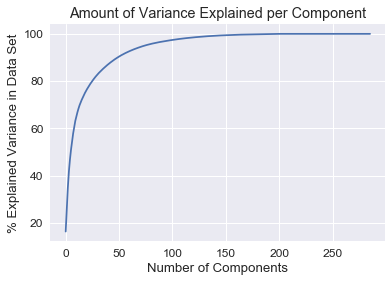

In [109]:
plt.plot(var1)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()